In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import dfca as DFCA
import ifca as IFCA

import numpy as np

from util import *

Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
rc = ipp.Cluster(n=2).start_and_connect_sync()
rc.activate()

rc.ids 

dview = rc[:]

Starting 2 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


  0%|          | 0/2 [00:00<?, ?engine/s]

In [3]:
seeds = [11,12,13,14,15]
learning_rates = [0.1]

dfca_gi = []
ifca = []

In [4]:
%%px --targets all

import sys
import os
sys.path.append(os.getcwd())

seeds = [11,12,13,14,15]
learning_rates = [0.1]

dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [5]:
%%px --target 0 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np


with open("config_dfca_gi.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



<AsyncResult(%px): pending>

Running the ifca experiment

In [6]:
%%px --target 1 --noblock
import ifca as IFCA
import json
import time
import torch
import numpy as np

with open("config_ifca.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------IFCA, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = IFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    ifca.append(res_mean)



<AsyncResult(%px): pending>

## Results

DFCA-GI Experiment Outputs

In [7]:
rc.wait_interactive()
_.display_outputs()

dfca_gi = rc[0].pull('dfca_gi', block=True)
ifca = rc[1].pull('ifca', block=True)

unknown:   0%|          | 0/2 [00:00<?, ?tasks/s]

---------------------------------IFCA, lr: 0.1, seed: 11---------------------------------
config: {'m': 4800, 'm_test': 800, 'p': 4, 'n': 50, 'uneven': True, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 11, 'train_seed': 11, 'config_override': '', 'project_dir': 'output_ifca'}
Using device: cuda
Epoch -1 tr: l 2.286 a 0.124 clct[1585, 1107, 1459, 649] cl_acc 0.369  9.088sec
Epoch -1 tst: l 2.286 a 0.123 clct[276, 162, 261, 101] cl_acc 0.346  1.795sec
Epoch 0 tr: l 2.189 a 0.258 clct[1023, 1050, 1645, 1082] cl_acc 0.607  lr 0.100000 31.296sec(train) 11.766sec(infer)
Epoch 0 tst: l 2.188 a 0.257 clct[166, 170, 281, 183] cl_acc 0.585  2.114sec
result written at output_ifca/results.pickle
checkpoint written at output_ifca/checkpoint.pt
Epoch 1 tr: l 1.995 a 0.425 clct[1108, 1191, 1229, 1272] cl_acc 0.899  lr 0.100000 30.734sec(train) 12.609sec(infer)
Epoch 1 tst: l 1.993 a 0.425 clct[193, 193, 194, 220] cl_acc 0.896  1.790sec
Epoch 2 tr: l 1.670 a 0.6

IFCA Experiment Outputs

In [8]:
__.display_outputs()

---------------------------------DFCA-GI, lr: 0.1, seed: 11---------------------------------
config: {'m': 4800, 'm_test': 800, 'p': 4, 'n': 50, 'uneven': True, 'local_model_init': False, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 11, 'train_seed': 11, 'config_override': '', 'project_dir': 'output_dfca_gi'}
Using device: cuda
Epoch -1 tr: l 2.286 a 0.124 clct[1585, 1107, 1459, 649] cl_acc 0.369  11.000sec
Epoch -1 tst: l 2.286 a 0.151 clct[276, 162, 261, 101] cl_acc 0.346  7.836sec
Epoch 0 tr: l 2.128 a 0.290 clct[1253, 1129, 1437, 981] cl_acc 0.437  lr 0.100000 73.436sec(train) 11.367sec(infer)
Epoch 0 tst: l 2.173 a 0.276 clct[208, 174, 262, 156] cl_acc 0.415  8.136sec
result written at output_dfca_gi/results.pickle
checkpoint written at output_dfca_gi/checkpoint.pt
Epoch 1 tr: l 1.966 a 0.408 clct[1224, 1055, 1268, 1253] cl_acc 0.587  lr 0.100000 72.990sec(train) 11.793sec(infer)
Epoch 1 tst: l 2.026 a 0.379 clct[198, 180, 217, 205] cl_acc 0.

IFCA Experiment Outputs

## Plots

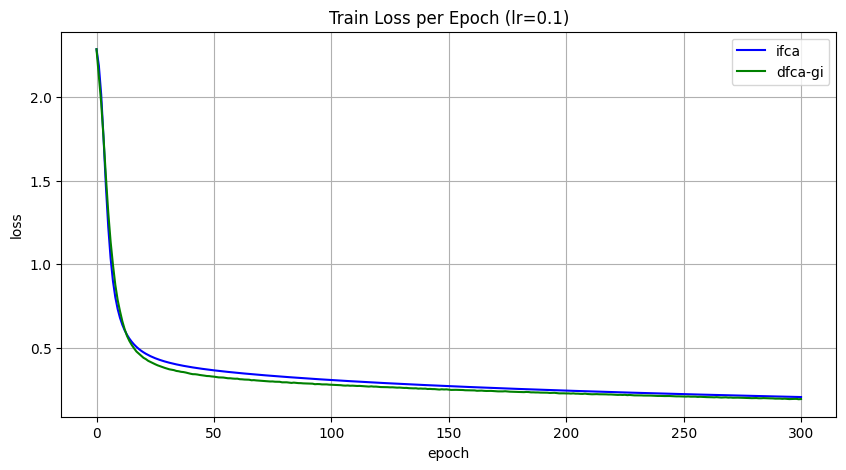

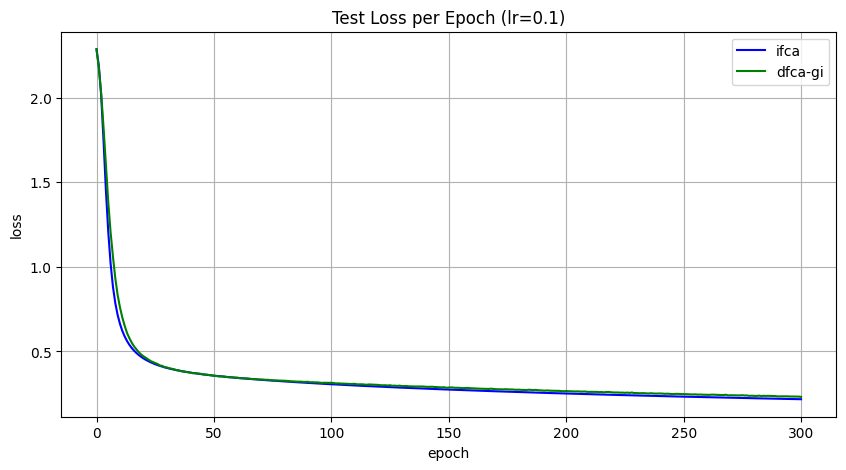

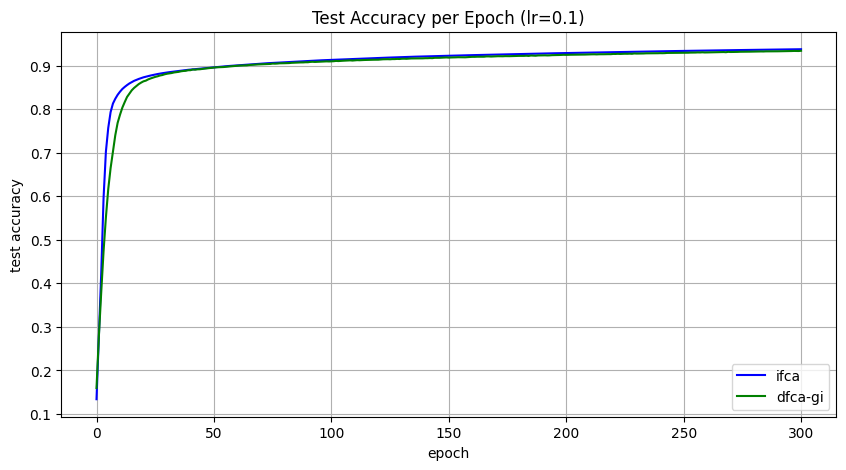

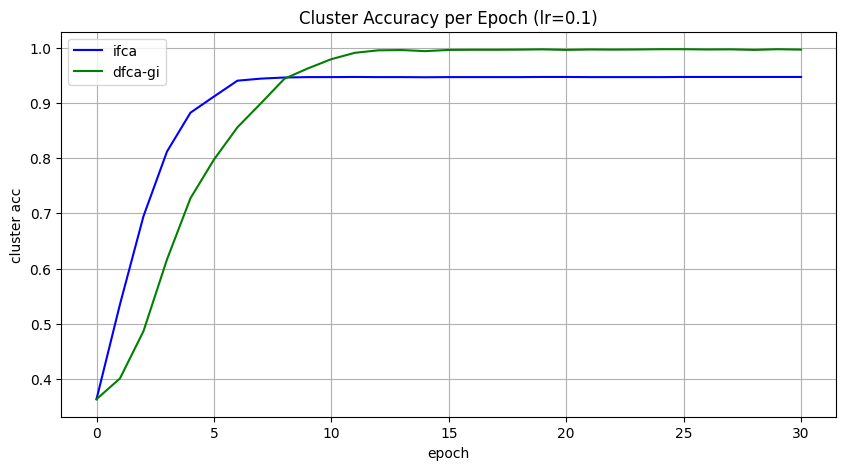

In [9]:

r_ifca = {}
r_dfca_gi = {}

r_ifca['test_loss'] = []
r_ifca['test_acc'] = []
r_ifca['cl_acc'] = []
r_ifca['train_loss'] = []
for i in range(len(learning_rates)):
    r_ifca['test_loss'].append(ifca[i][0])
    r_ifca['test_acc'].append(ifca[i][1])
    r_ifca['cl_acc'].append(ifca[i][2])
    r_ifca['train_loss'].append(ifca[i][3])

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])



os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['train_loss'][l], label='ifca', color='blue')
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Train Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '3_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_loss'][l], label='ifca', color='blue')
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '3_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_acc'][l], label='ifca', color='blue')
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '3_test_acc.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['cl_acc'][l][:31], label='ifca', color='blue')
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('cluster acc')
    plt.title(f'Cluster Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '3_cluster_acc.png'))